### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a US bike-sharing company, is facing significant revenue decline due to the COVID-19 pandemic. To recover and thrive post-pandemic, they aim to understand and predict the demand for shared bikes in the American market.

#### Objective:

1. Identify key factors influencing bike-sharing demand.
2. Build a predictive model to estimate bike demand based on these factors.

### Import Necessary Libraries

In [2030]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Importing statsmodels
import statsmodels.api as sm

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike Sharing dataset

In [2572]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2573]:
# Get shape of the dataset
bike.shape

(730, 16)

In [2574]:
# Show info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2575]:
# Describe of the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Finding
This dataset have 730 rows and 16 columns.

One column has 'object' datatype and others have either 'int64' or 'float64' datatypes.

Some variables are categorical in nature.

### Data Quality Check

Check for NULL/Missing values

In [2576]:
# Check for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####  Check for duplicate rows in dateset

In [2577]:
round((bike.isnull().sum(axis=1)/len(bike))*100, 2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Bike dataset don't have any null/missing values in rows/columns

### Data Cleaning and Preparation

Checking value_counts() for the dataset to identify if any column have junk/unknown values. If any column have junk/unknown values then we have to drop these columns.

In [2578]:
bike_dummy = bike.iloc[:, 1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=True), '\n\n')

01-01-2018    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
30-04-2019    1
             ..
04-09-2018    1
05-09-2018    1
06-09-2018    1
08-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


4    178
1    180
2    184
3    188
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64 


1     21
0    709
Name: holiday, dtype: int64 


3    103
2    104
4    104
5    104
6    105
0    105
1    105
Name: weekday, dtype: int64 


0    231
1    499
Name: workingday, dtype: int64 


3     21
2    246
1    463
Name: weathersit, dtype: int64 


14.110847    1
15.033347    1
11.445847    1
16.707500    1
18.620847    1
            ..
19.850847    4
26.615847    4
23.130847    4
10.899153    5
26.035000    5
Name: temp, Length: 498, dtype: int64 


18.18125    1
28.69375    1
30.74625    1
29.92435    1
22.85190    1
   

After analysis using value_counts() method we have found that there is not any junk/unknown values in any coulmns of the dataset.

#### Removing unknown and redundent columns

1. **instant**: This column is a index column of the dataset.

2. **dteday**: This is the date column but we already have 'yr', 'mnth' coulmns. So we can drop this column.

3. **casual & registered**: After analysing data dictionary, we can understand that this two columns don't have any role because we need to find total count of the bikes and not by specific category.

In [2579]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [2580]:
bike_df = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Univariate Analysis

Season status
Season 1: 24.65753424657534
Season 2: 25.205479452054796
Season 3: 25.753424657534246
Season 4: 24.383561643835616


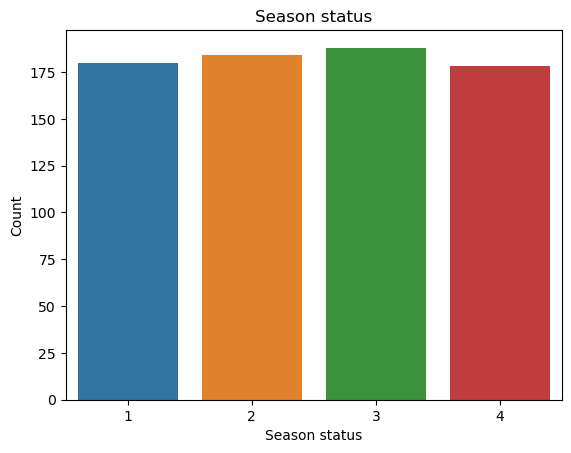

In [2581]:
# Season status
print("Season status")
seasons = bike_df['season'].unique()
seasons = sorted(seasons)
for season in seasons:
    print(f"Season {season}: {len(bike_df[bike_df['season'] == season])/len(bike_df['season'])*100}")

season = sns.countplot(x = 'season', data = bike_df)
season.set_title('Season status')
season.set_xlabel('Season status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that season data are almost equaly distributed in "Spring", "Summer", "Fall" and "Winter" seasons.

Year status
Year 2018: 50.0
Year 2019: 50.0


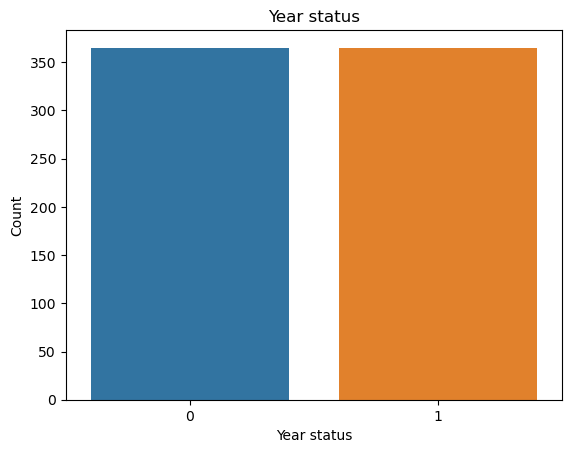

In [2582]:
# Year status
print("Year status")
print(f"Year 2018: {len(bike_df[bike_df['yr'] == 0])/len(bike_df['yr'])*100}")
print(f"Year 2019: {len(bike_df[bike_df['yr'] == 1])/len(bike_df['yr'])*100}")

season = sns.countplot(x = 'yr', data = bike_df)
season.set_title('Year status')
season.set_xlabel('Year status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that year data are equaly distributed in 2018 and 2019.

Month status
Month 1: 8.493150684931507
Month 2: 7.671232876712329
Month 3: 8.493150684931507
Month 4: 8.21917808219178
Month 5: 8.493150684931507
Month 6: 8.21917808219178
Month 7: 8.493150684931507
Month 8: 8.493150684931507
Month 9: 8.21917808219178
Month 10: 8.493150684931507
Month 11: 8.21917808219178
Month 12: 8.493150684931507


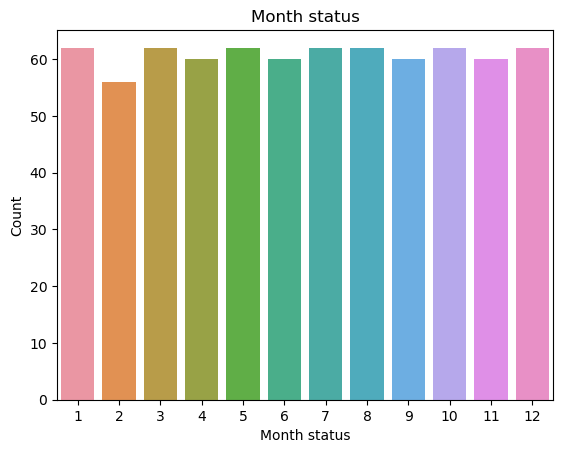

In [2583]:
# Month status
print("Month status")
months = bike_df['mnth'].unique()
months = sorted(months)
for month in months:
    print(f"Month {month}: {len(bike_df[bike_df['mnth'] == month])/len(bike_df['mnth'])*100}")

season = sns.countplot(x = 'mnth', data = bike_df)
season.set_title('Month status')
season.set_xlabel('Month status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses frequancies is almost same in all months except Feburary month. In Feburary month bike uses is lower than other months. 

Holiday status
No Holiday: 97.12328767123287
Holiday: 2.8767123287671232


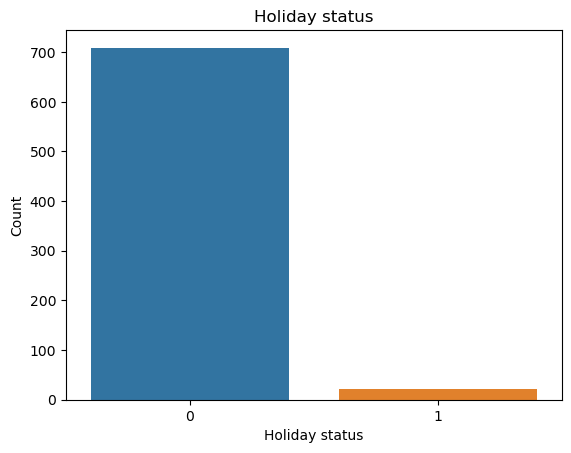

In [2584]:
# Holiday status
print("Holiday status")
print(f"No Holiday: {len(bike_df[bike_df['holiday'] == 0])/len(bike_df['holiday'])*100}")
print(f"Holiday: {len(bike_df[bike_df['holiday'] == 1])/len(bike_df['holiday'])*100}")

season = sns.countplot(x = 'holiday', data = bike_df)
season.set_title('Holiday status')
season.set_xlabel('Holiday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses is maximum (97.12%) when there is no holiday but bike uses is minimum(2.87%) when there is holiday.

Weekday status
Weekday 0: 14.383561643835616
Weekday 1: 14.383561643835616
Weekday 2: 14.246575342465754
Weekday 3: 14.10958904109589
Weekday 4: 14.246575342465754
Weekday 5: 14.246575342465754
Weekday 6: 14.383561643835616


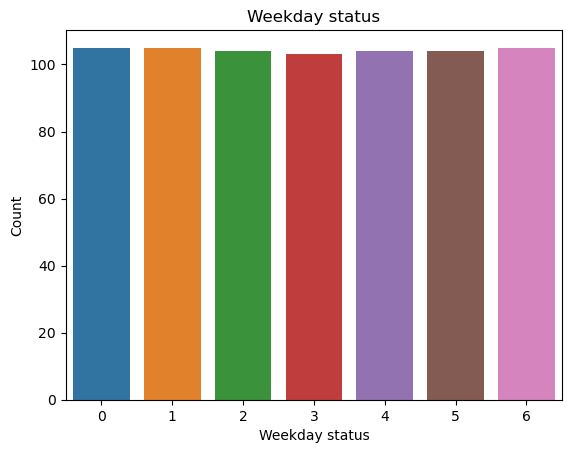

In [2585]:
# Weekday status
print("Weekday status")
weekdays = bike_df['weekday'].unique()
weekdays = sorted(weekdays)
for weekday in weekdays:
    print(f"Weekday {weekday}: {len(bike_df[bike_df['weekday'] == weekday])/len(bike_df['weekday'])*100}")

season = sns.countplot(x = 'weekday', data = bike_df)
season.set_title('Weekday status')
season.set_xlabel('Weekday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on every weekday are simillar approx(14%).

Workingday status
Workingday 0: 31.643835616438352
Workingday 1: 68.35616438356165


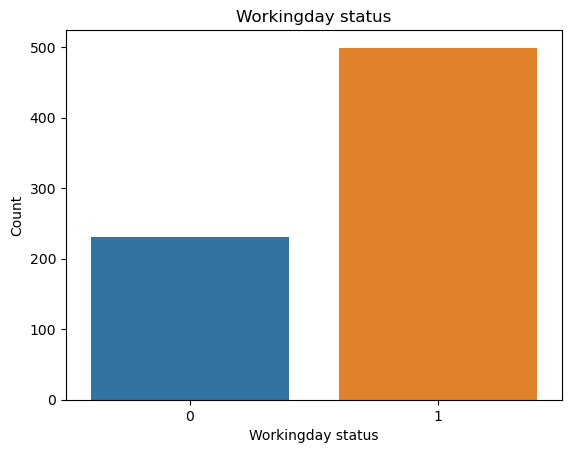

In [2586]:
# Workingday status
print("Workingday status")
workingdays = bike_df['workingday'].unique()
workingdays = sorted(workingdays)
for workingday in workingdays:
    print(f"Workingday {workingday}: {len(bike_df[bike_df['workingday'] == workingday])/len(bike_df['workingday'])*100}")

season = sns.countplot(x = 'workingday', data = bike_df)
season.set_title('Workingday status')
season.set_xlabel('Workingday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on working day is almost double(68%) than non-working days(31%).

Weathersit status
Weathersit 1: 63.42465753424658
Weathersit 2: 33.6986301369863
Weathersit 3: 2.8767123287671232


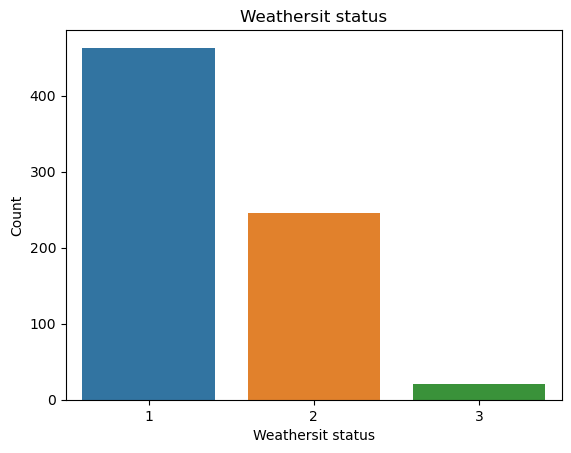

In [2587]:
# weathersit status
print("Weathersit status")
weathersits = bike_df['weathersit'].unique()
weathersits = sorted(weathersits)
for weathersit in weathersits:
    print(f"Weathersit {weathersit}: {len(bike_df[bike_df['weathersit'] == weathersit])/len(bike_df['weathersit'])*100}")

season = sns.countplot(x = 'weathersit', data = bike_df)
season.set_title('Weathersit status')
season.set_xlabel('Weathersit status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bikes are in used when weather condition was either "mixed clouds" or "misty".

Temp status


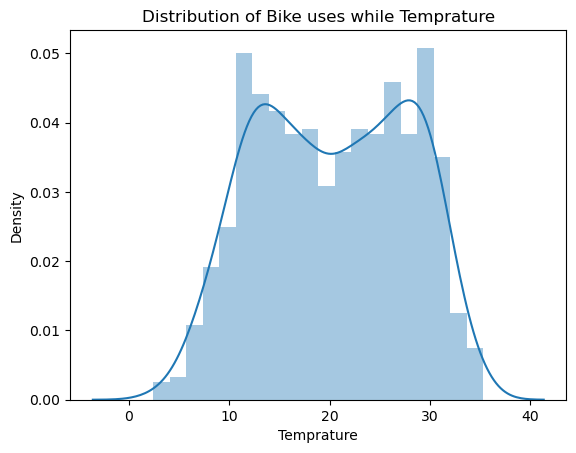

In [2588]:
# Temp status
print("Temp status")
ls = sns.distplot(bike_df['temp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Temprature')
ls.set_xlabel('Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when temprature was between 10 to 30.

Feeling Temprature status


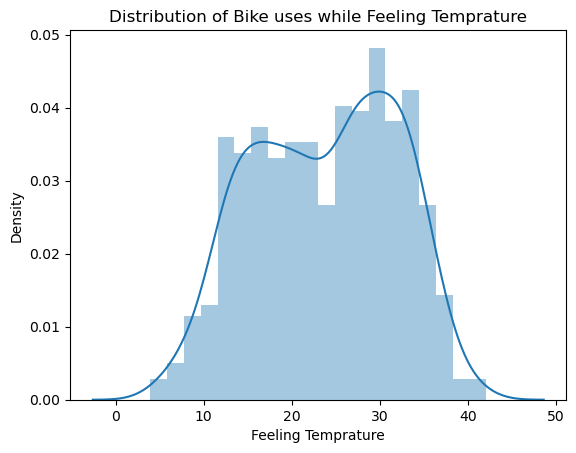

In [2589]:
# Feeling Temprature status
print("Feeling Temprature status")
ls = sns.distplot(bike_df['atemp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Feeling Temprature')
ls.set_xlabel('Feeling Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when feeling temprature in Celsius was between 15 to 35.

Humidity status


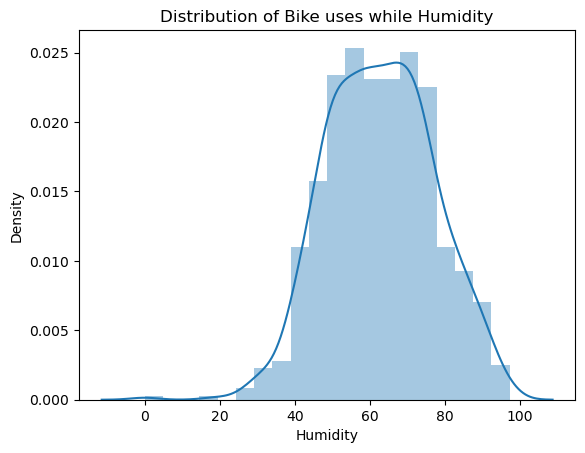

In [2590]:
# Humidity status
print("Humidity status")
ls = sns.distplot(bike_df['hum'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Humidity')
ls.set_xlabel('Humidity')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when humidity was between 40 to 85.


Windspeed status


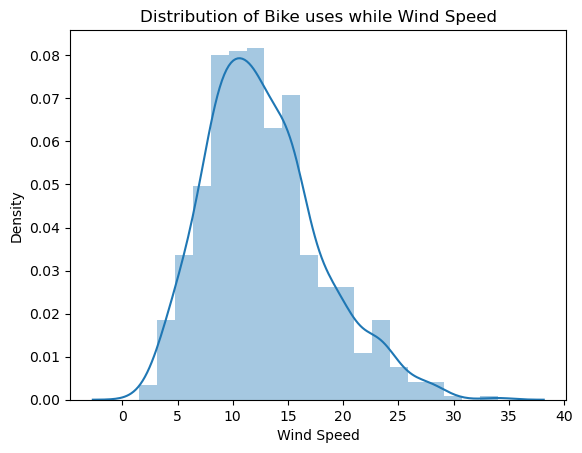

In [2591]:
# Windspeed status
print("Windspeed status")
ls = sns.distplot(bike_df['windspeed'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Wind Speed')
ls.set_xlabel('Wind Speed')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when wind speed was between 5 to 20.

## Bivariate Analysis

In this part of Analysis, lets find out if there is a relationship between two sets of values.
We will do bivariate analysis of each of independent variables(season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed) with dependent variable **cnt** (count of total rental bikes including both casual and registered).

### Bivariate Analysis of Season against count of total rental bikes

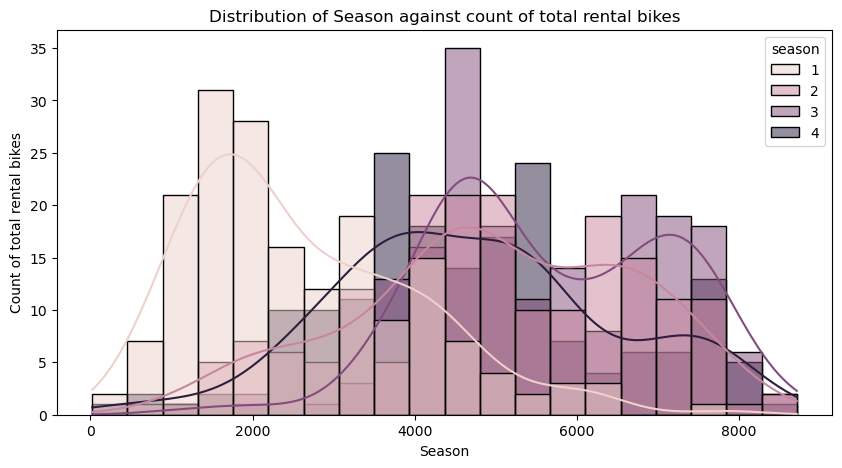

In [2592]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike_df, x='cnt', hue='season',  kde=True, bins=20)
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

#### Bivariate Analysis of Months against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

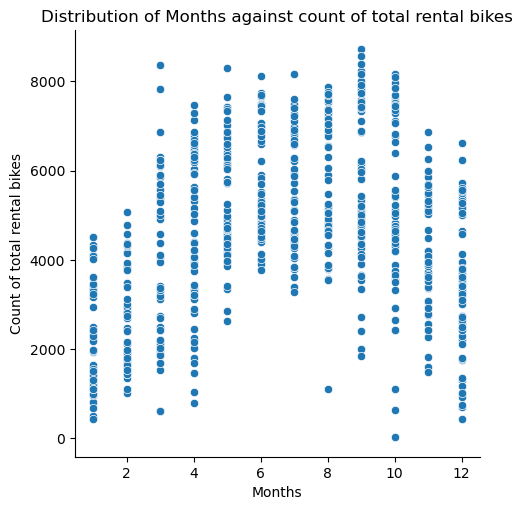

In [2593]:
# Distribution of Months against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x="mnth", y="cnt")
plt.title('Distribution of Months against count of total rental bikes')
plt.xlabel('Months')
plt.ylabel('Count of total rental bikes')
plt.show()

#### Bivariate Analysis of Weekday against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

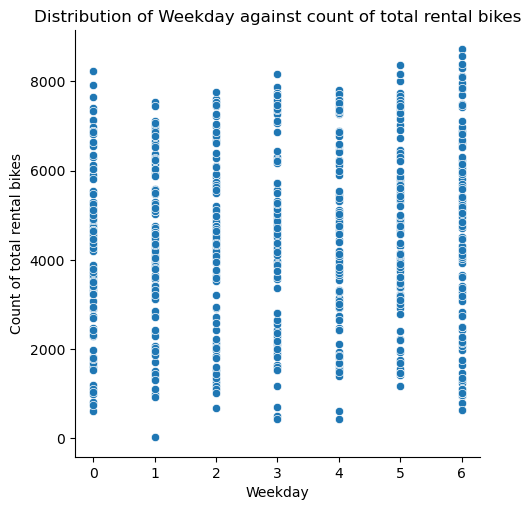

In [2594]:
# Distribution of Weekday against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x="weekday", y="cnt")
plt.title('Distribution of Weekday against count of total rental bikes')
plt.xlabel('Weekday')
plt.ylabel('Count of total rental bikes')
plt.show()

#### Bivariate Analysis of weathersit against count of total rental bikes

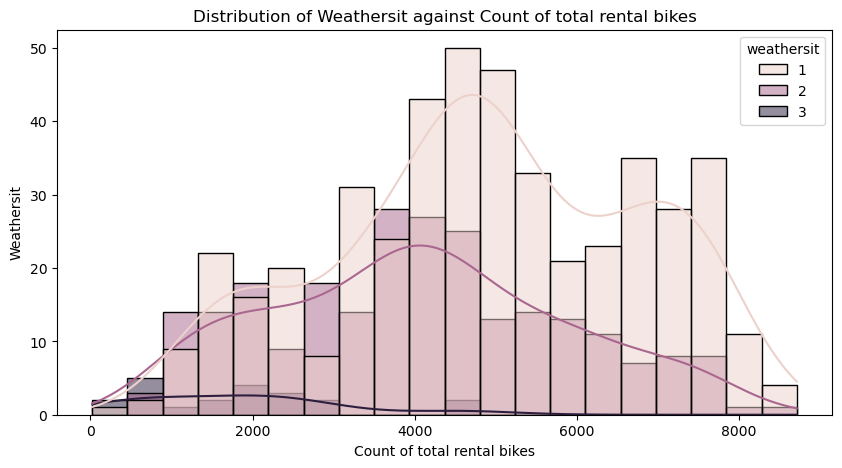

In [2595]:
# Distribution of Weathersit against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike_df, x='cnt', hue='weathersit',  kde=True, bins=20)
plt.title('Distribution of Weathersit against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Weathersit')
plt.show()

#### Bivariate Analysis of Temprature against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

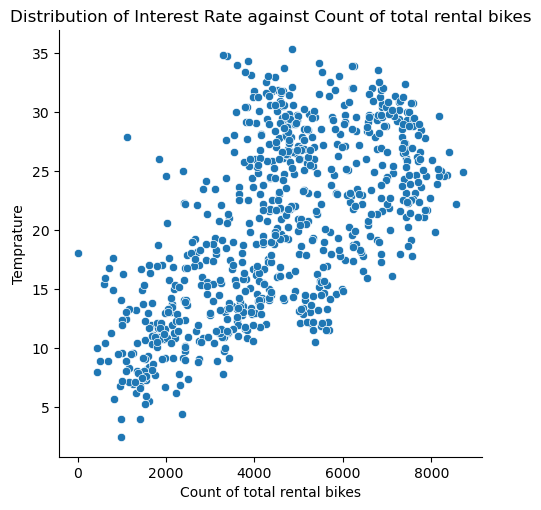

In [2596]:
# Distribution of Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x='cnt', y='temp')
plt.title('Distribution of Interest Rate against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Temprature')
plt.show()

#### Bivariate Analysis of Feeling Temprature against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

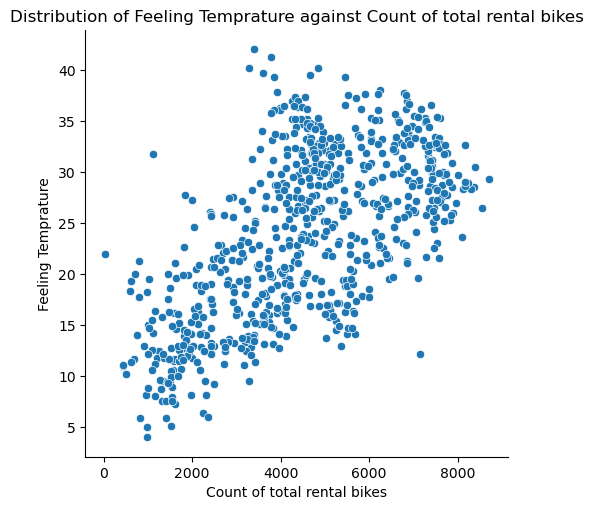

In [2597]:
# Distribution of Feeling Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x='cnt', y='atemp')
plt.title('Distribution of Feeling Temprature against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Feeling Temprature')
plt.show()

#### Bivariate Analysis of Humidity against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

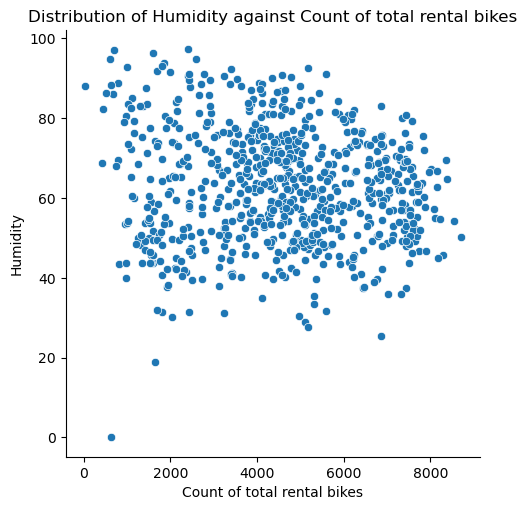

In [2598]:

# Distribution of Humidity against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x='cnt', y='hum')
plt.title('Distribution of Humidity against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Humidity')
plt.show()

#### Bivariate Analysis of wind speed against count of total rental bikes

<Figure size 1000x500 with 0 Axes>

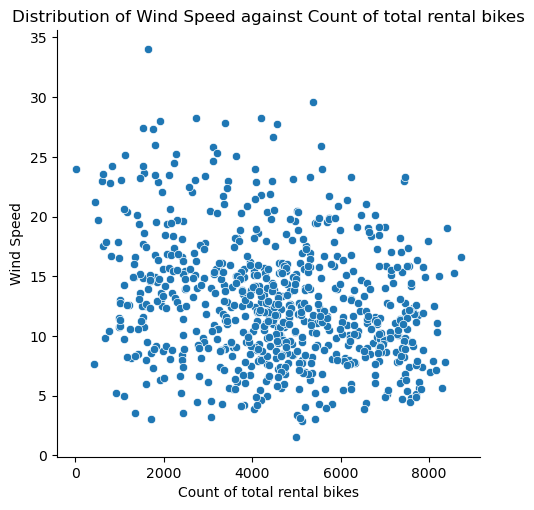

In [2599]:

# Distribution of Wind Speed against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike_df, x='cnt', y='windspeed')
plt.title('Distribution of Wind Speed against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Wind Speed')
plt.show()

### Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 5000x5000 with 0 Axes>

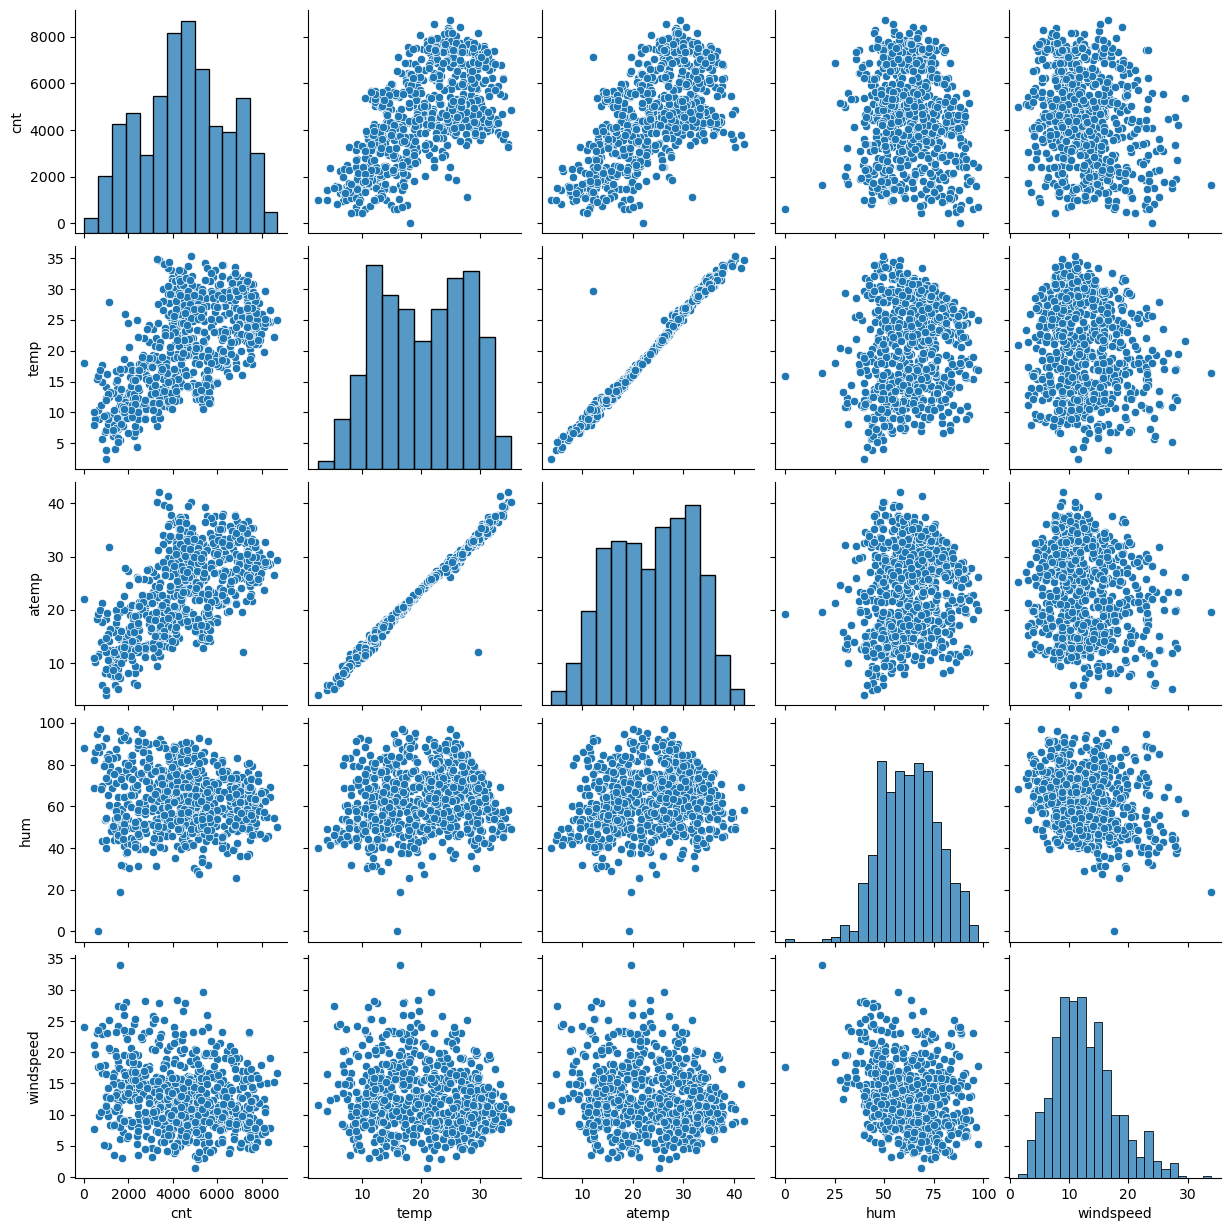

In [2600]:
# Visualising the numrical variables
plt.figure(figsize = (50, 50))
sns.pairplot(bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])

plt.savefig("pairplot.png")
plt.show()
plt.close()

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

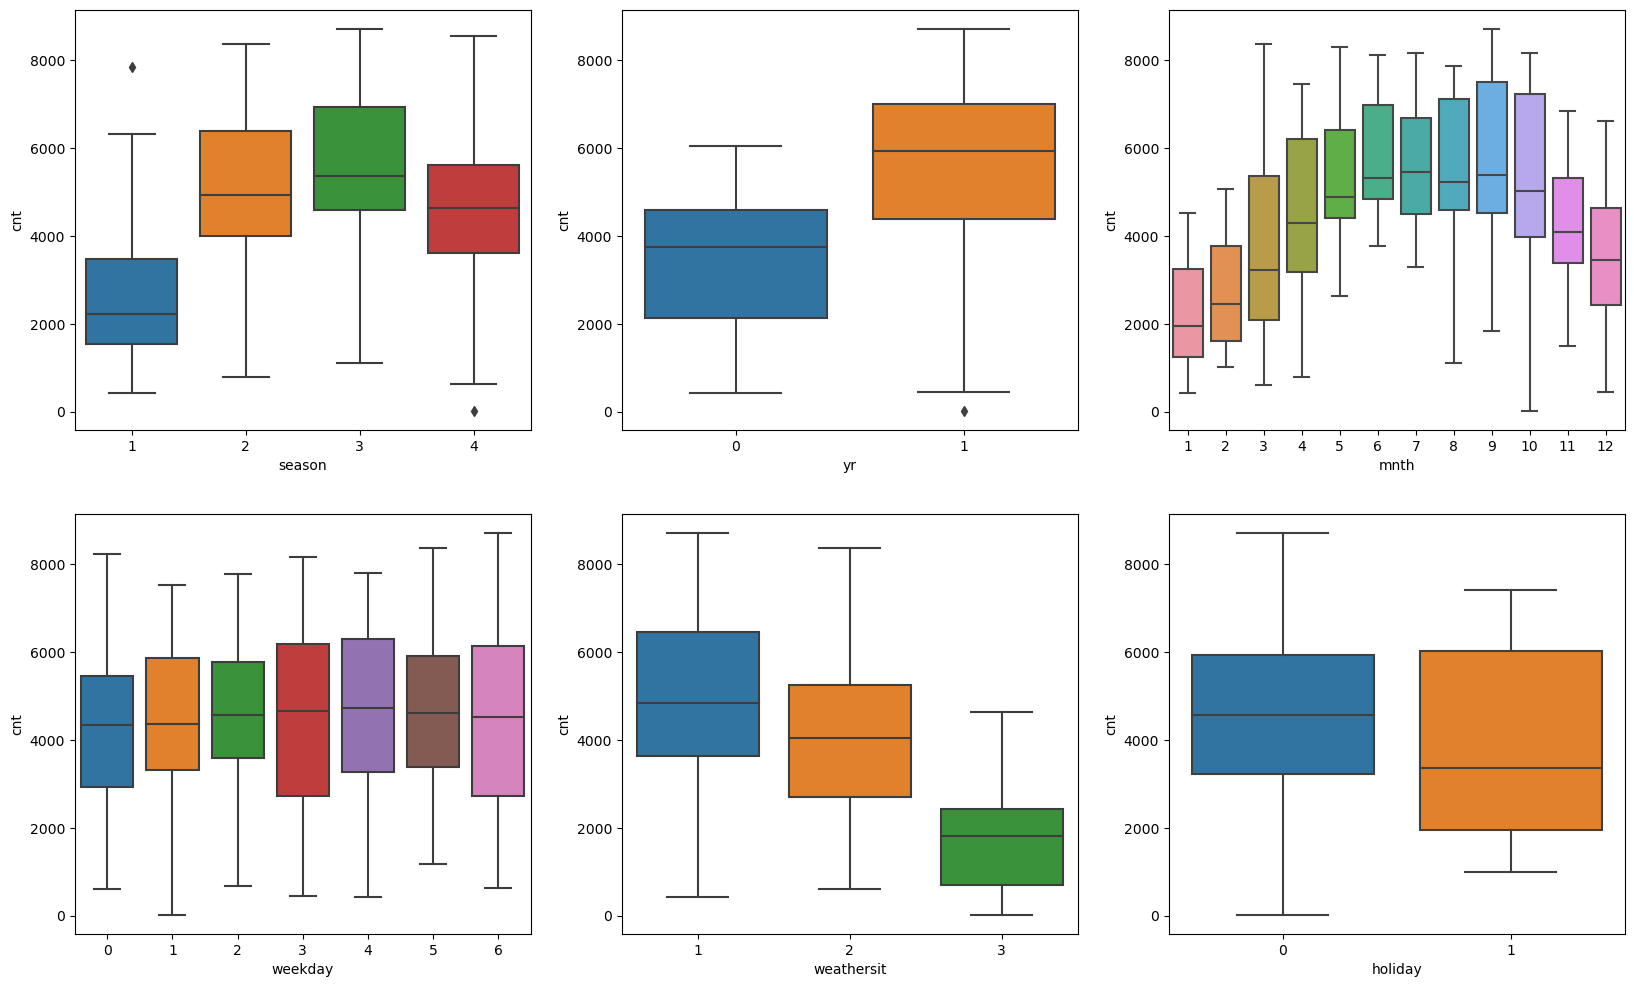

In [2601]:
# visualising the categorical variables
plt.figure(figsize = (20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_df)
plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike_df)
plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_df)
plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_df)
plt.subplot(2, 3, 5)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)
plt.subplot(2, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=bike_df)
plt.show()

- The graph clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.

- For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.

- The year 2019 had a higher count of users as compared to the year 2018.

- The count of rentals is almost even throughout the week.

- There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.

- The number of rentals peaked in July and September. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.

- The count of users is less during the holidays.

- From the "Workingday" boxplot we can see those maximum bookings happening between 3000 and 6000, that is the median count of users is constant almost throughout the week. There is not much of difference in booking whether its working day or not.

## Step 3: Data Preparation

- We can see that our dataset has some columns with values as string values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [2602]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Converting 'season'', "weathersit", "mnth" and "weekday" values into categorical string values

In [2603]:
# Converting 'season''s values into categorical string values
bike_df['season'] = bike_df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2604]:
# Converting 'weathersit''s values into categorical string values
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Mixed clouds', 2:'Misty', 3:'Light precipitation', 4:'Heavy precipitation'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Mixed clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Mixed clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Mixed clouds,9.305237,11.46350,43.6957,12.522300,1600


In [2605]:
# Converting 'mnth''s values into categorical string values
import calendar

bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,Mixed clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,Mixed clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,Mixed clouds,9.305237,11.46350,43.6957,12.522300,1600


In [2606]:
# Converting 'weekday''s values into categorical string values
bike_df['weekday'] = bike_df['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thrusday', 5:'Friday', 6:'Sutarday'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sutarday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Mixed clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Mixed clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Mixed clouds,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables
The variables `mnth`, `weekday`, `season`, `weathersit` have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.

We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [2607]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
dummy = bike_df[['season','mnth','weekday','weathersit']]

In [2608]:
dummy.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Sutarday,Misty
1,Spring,Jan,Sunday,Misty
2,Spring,Jan,Monday,Mixed clouds
3,Spring,Jan,Tuesday,Mixed clouds
4,Spring,Jan,Wednesday,Mixed clouds


In [2609]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [2610]:
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Sutarday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Misty,weathersit_Mixed clouds
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [2611]:
# Adding the dummy variables to the original dataset
bike_df = pd.concat([dummy,bike_df],axis = 1)

In [2612]:
bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sutarday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mixed clouds,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mixed clouds,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Mixed clouds,9.305237,11.46350,43.6957,12.522300,1600


In [2613]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike_df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Misty,weathersit_Mixed clouds,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [2614]:

# We specify this so that the train and test data set always have the same rows, respectivly
np.random.seed(0)

df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

We will use MinMax scaling.

In [2615]:
# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [2616]:
# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

In [2617]:
# Apply scaler() to all the columns except  the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [2618]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Misty,weathersit_Mixed clouds,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [2619]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Misty,weathersit_Mixed clouds,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.343137,0.627451,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.475223,0.483958,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


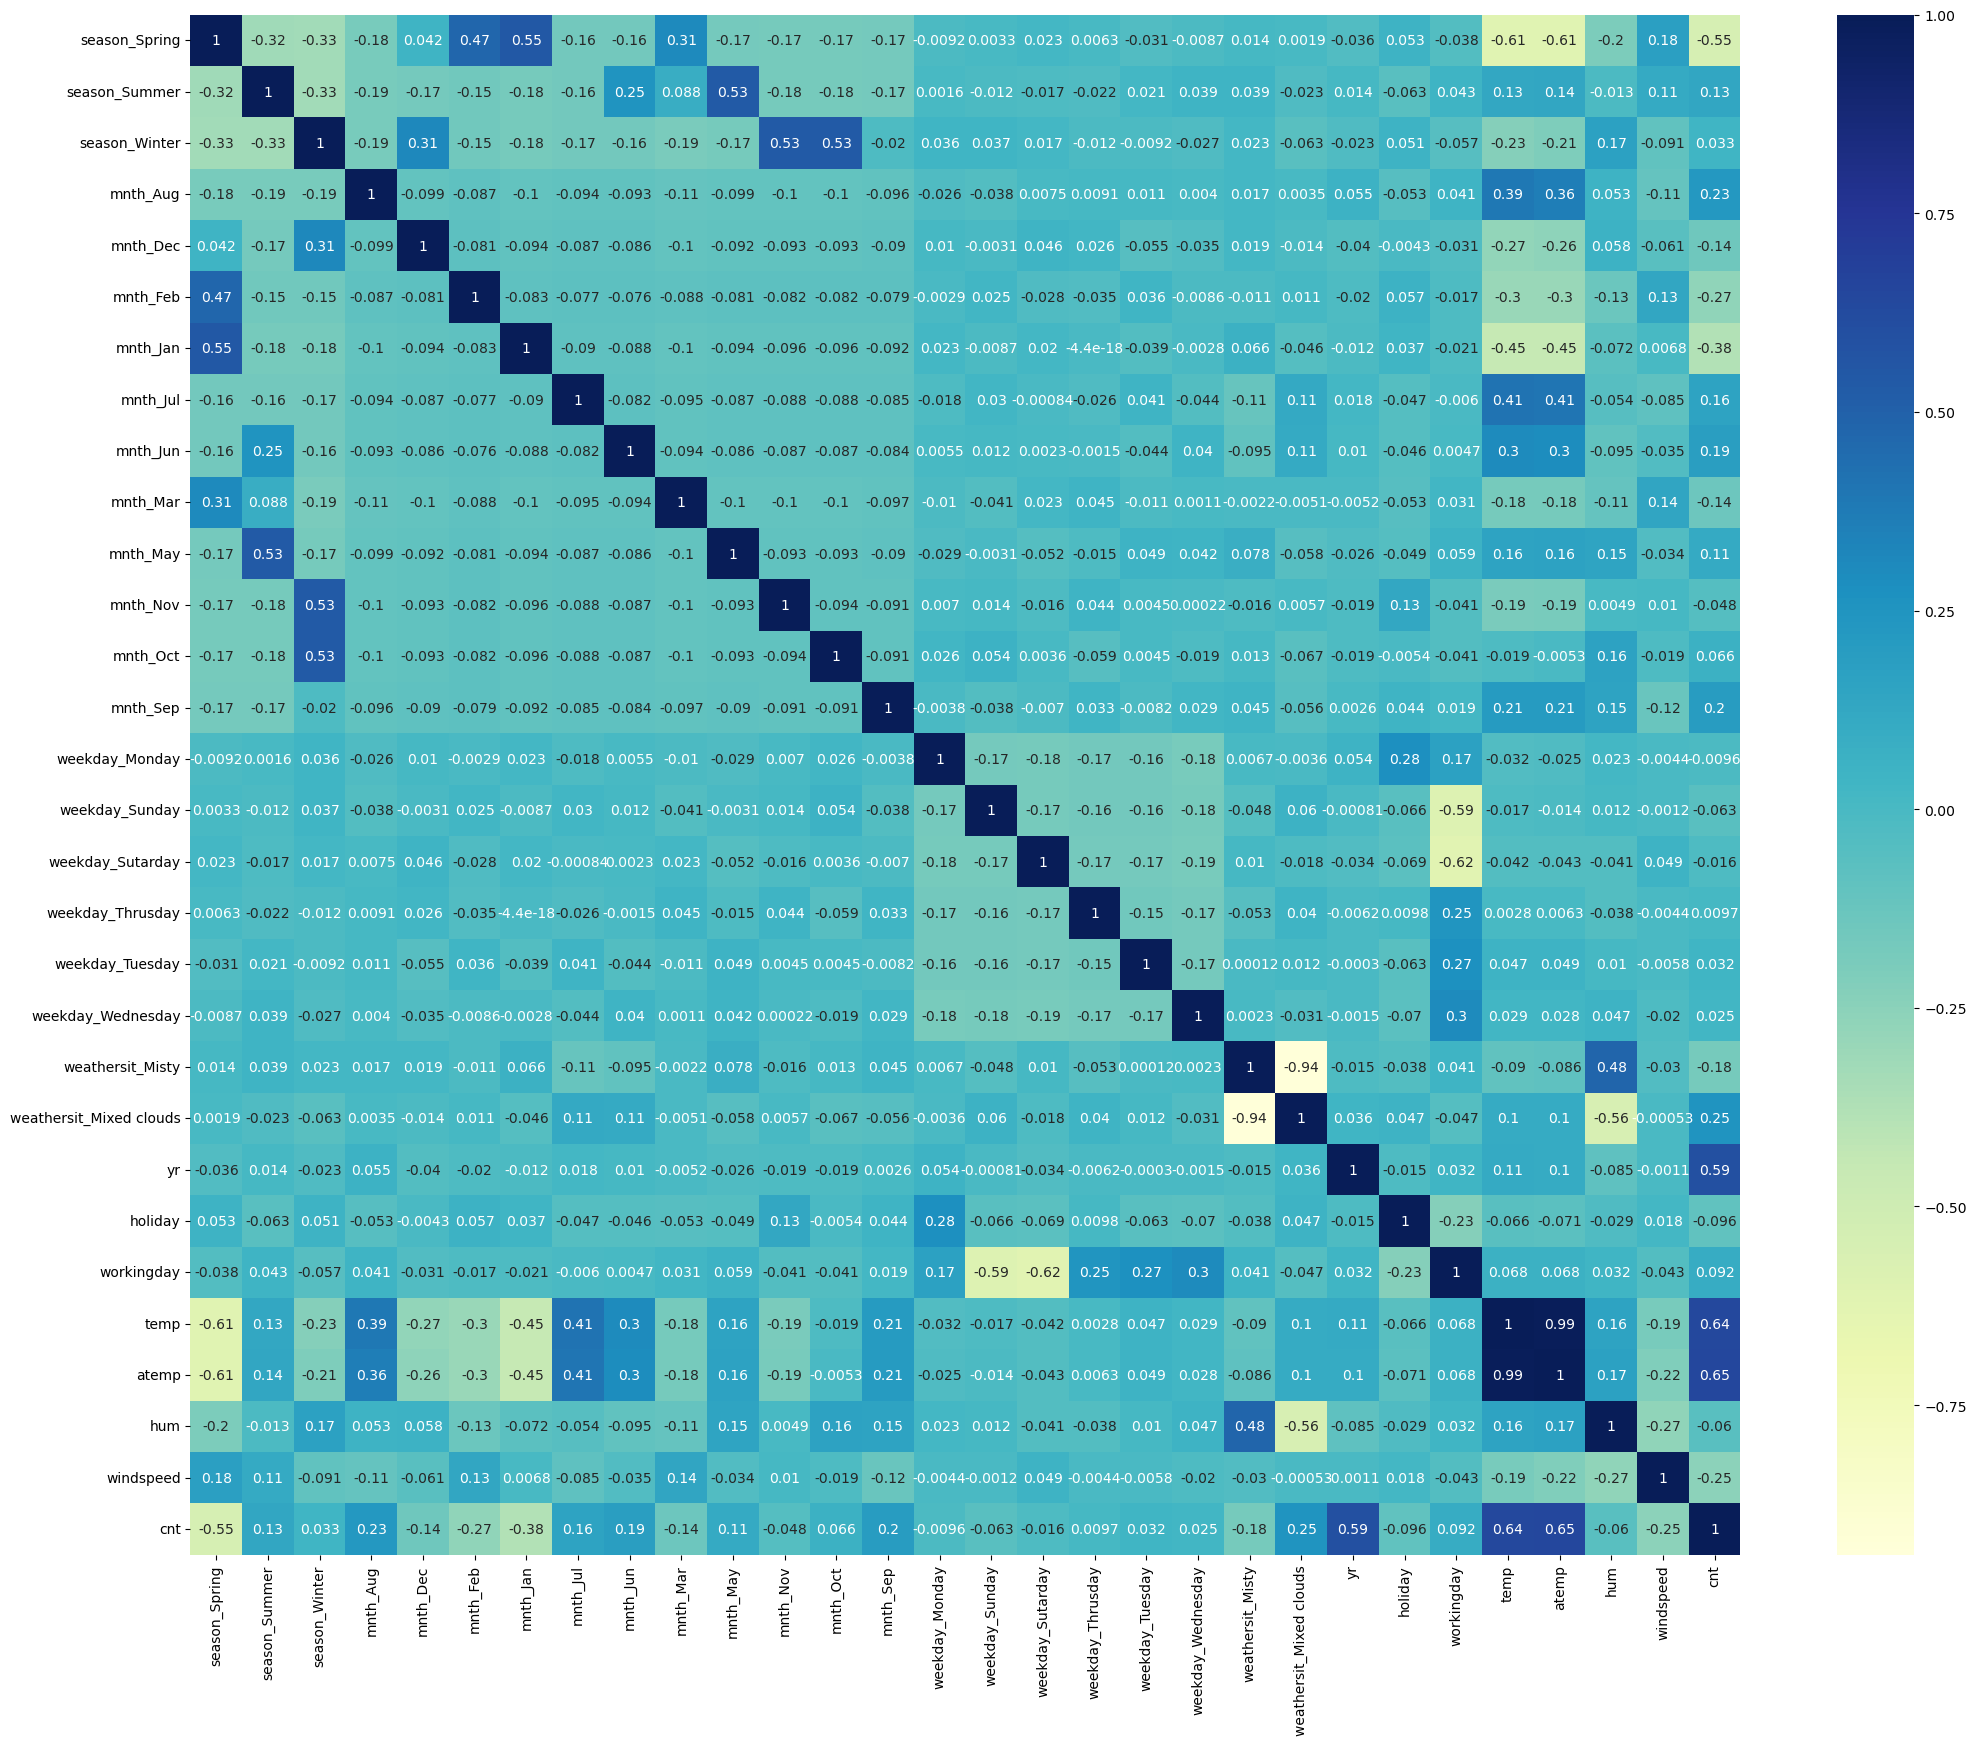

In [2620]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

#### Inference:

As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

### Dividing into X and Y sets for the model building

In [2621]:
y_train = df_train.pop('cnt')
X_train = df_train

In [2622]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Misty,weathersit_Mixed clouds,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475


In [2623]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building our model

#### APPROACH USED :

We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

#### Feature Selection
We start with 20 variables.

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [2624]:
# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [2625]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 10),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Sunday', True, 1),
 ('weekday_Sutarday', True, 1),
 ('weekday_Thrusday', False, 7),
 ('weekday_Tuesday', False, 4),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Misty', True, 1),
 ('weathersit_Mixed clouds', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [2626]:
# Remove columns using rfe.support_
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Jan', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep',
       'weekday_Sunday', 'weekday_Sutarday', 'weathersit_Misty',
       'weathersit_Mixed clouds', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [2627]:
# List removed columns
X_train.columns[~rfe.support_]

Index(['mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun', 'mnth_Nov',
       'weekday_Monday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using first statsmodel, for the detailed statistics

For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [2628]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2629]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [2630]:
lm = sm.OLS(y_train, X_train_lm).fit() # Running the linear model

In [2631]:
# Let's see the summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.13e-189
Time:                        11:40:42   Log-Likelihood:                 524.83
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0057      0.038      0.148      0.882      -0.070       0.081
season_Spring              -0.0388      0.023     -1.686      0.092      -0.084       0.006
season_Summer               0.0684      0.018      3.807      0.000       0.033       0.104
season_Winter               0.1017      0.020      5.013      0.000       0.062       0.142
mnth_Aug                    0.0477      0.017      2.756      0.006       0.014       0.082
mnth_Jan                   -0.0306      0.018     -1.666      0.096      -0.067       0.006
mnth_Mar                    0.0220      0.015      1.430      0.153      -0.008       0.052
mnth_May                    0.0294      0.018      1.669      0.096      -0.005       0.064
mnth_Oct                    0.0480      0.017      2.788      0.006       0.014       0.082
mnth_Sep                    0.1171      0.017      6.886      0.000       0.084       0.151
weekday_Sunday             -0.0102      0.014     -0.734      0.463      -0.038       0.017
weekday_Sutarday            0.0434      0.013      3.289      0.001       0.017       0.069
weathersit_Misty            0.1949      0.025      7.868      0.000       0.146       0.244
weathersit_Mixed clouds     0.2542      0.026      9.713      0.000       0.203       0.306
yr                          0.2315      0.008     29.031      0.000       0.216       0.247
holiday                    -0.0613      0.022     -2.732      0.007      -0.105      -0.017
workingday                  0.0338      0.011      2.939      0.003       0.011       0.056
temp                        0.4442      0.133      3.336      0.001       0.183       0.706
atemp                       0.0243      0.136      0.179      0.858      -0.242       0.291
hum                        -0.1643      0.038     -4.378      0.000      -0.238      -0.091
windspeed                  -0.1858      0.026     -7.174      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       85.064   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.162
Skew:                          -0.809   Prob(JB):                     3.17e-52
Kurtosis:                       5.923   Cond. No.                     4.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [2632]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
15,workingday,99.94
16,temp,59.17
17,atemp,54.28
10,weekday_Sutarday,23.48
9,weekday_Sunday,22.47
12,weathersit_Mixed clouds,10.49
11,weathersit_Misty,9.07
0,season_Spring,6.37
2,season_Winter,5.04
14,holiday,4.90


In [2633]:
# dropping holiday since its vif is inf

X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

### Building model using second statsmodel, for the detailed statistics


In [2634]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.90e-190
Time:                        11:40:43   Log-Likelihood:                 524.81
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0053      0.038      0.139      0.890      -0.070       0.081
season_Spring              -0.0384      0.023     -1.679      0.094      -0.083       0.007
season_Summer               0.0688      0.018      3.857      0.000       0.034       0.104
season_Winter               0.1021      0.020      5.068      0.000       0.063       0.142
mnth_Aug                    0.0473      0.017      2.755      0.006       0.014       0.081
mnth_Jan                   -0.0307      0.018     -1.673      0.095      -0.067       0.005
mnth_Mar                    0.0220      0.015      1.432      0.153      -0.008       0.052
mnth_May                    0.0293      0.018      1.666      0.096      -0.005       0.064
mnth_Oct                    0.0480      0.017      2.793      0.005       0.014       0.082
mnth_Sep                    0.1171      0.017      6.894      0.000       0.084       0.150
weekday_Sunday             -0.0103      0.014     -0.738      0.461      -0.038       0.017
weekday_Sutarday            0.0433      0.013      3.290      0.001       0.017       0.069
weathersit_Misty            0.1952      0.025      7.910      0.000       0.147       0.244
weathersit_Mixed clouds     0.2545      0.026      9.767      0.000       0.203       0.306
yr                          0.2315      0.008     29.060      0.000       0.216       0.247
holiday                    -0.0615      0.022     -2.750      0.006      -0.105      -0.018
workingday                  0.0337      0.011      2.939      0.003       0.011       0.056
temp                        0.4672      0.035     13.327      0.000       0.398       0.536
hum                        -0.1639      0.037     -4.379      0.000      -0.237      -0.090
windspeed                  -0.1867      0.025     -7.360      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       84.820   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.345
Skew:                          -0.807   Prob(JB):                     4.77e-52
Kurtosis:                       5.919   Cond. No.                     4.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2635]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
15,workingday,99.71
10,weekday_Sutarday,23.42
9,weekday_Sunday,22.42
12,weathersit_Mixed clouds,10.43
11,weathersit_Misty,9.02
0,season_Spring,6.33
2,season_Winter,4.98
14,holiday,4.88
16,temp,4.11
1,season_Summer,3.86


Here we see that the p-value for all the weekday_Sunday is > 0.05 . Hence, we drop this variable and create new model.

In [2636]:
X_train_rfe = X_train_rfe.drop(['weekday_Sunday'], axis=1)

### Building model using third statsmodel, for the detailed statistics

In [2637]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.90e-190
Time:                        11:40:43   Log-Likelihood:                 524.81
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0049      0.049     -0.101      0.920      -0.101       0.091
season_Spring              -0.0384      0.023     -1.679      0.094      -0.083       0.007
season_Summer               0.0688      0.018      3.857      0.000       0.034       0.104
season_Winter               0.1021      0.020      5.068      0.000       0.063       0.142
mnth_Aug                    0.0473      0.017      2.755      0.006       0.014       0.081
mnth_Jan                   -0.0307      0.018     -1.673      0.095      -0.067       0.005
mnth_Mar                    0.0220      0.015      1.432      0.153      -0.008       0.052
mnth_May                    0.0293      0.018      1.666      0.096      -0.005       0.064
mnth_Oct                    0.0480      0.017      2.793      0.005       0.014       0.082
mnth_Sep                    0.1171      0.017      6.894      0.000       0.084       0.150
weekday_Sutarday            0.0536      0.014      3.714      0.000       0.025       0.082
weathersit_Misty            0.1952      0.025      7.910      0.000       0.147       0.244
weathersit_Mixed clouds     0.2545      0.026      9.767      0.000       0.203       0.306
yr                          0.2315      0.008     29.060      0.000       0.216       0.247
holiday                    -0.0512      0.027     -1.917      0.056      -0.104       0.001
workingday                  0.0440      0.011      3.840      0.000       0.021       0.067
temp                        0.4672      0.035     13.327      0.000       0.398       0.536
hum                        -0.1639      0.037     -4.379      0.000      -0.237      -0.090
windspeed                  -0.1867      0.025     -7.360      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       84.820   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.345
Skew:                          -0.807   Prob(JB):                     4.77e-52
Kurtosis:                       5.919   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2638]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
16,hum,26.36
15,temp,23.12
11,weathersit_Mixed clouds,15.98
10,weathersit_Misty,9.55
0,season_Spring,7.10
2,season_Winter,5.71
14,workingday,5.49
17,windspeed,4.77
1,season_Summer,4.59
12,yr,2.11


Here we see that the p-value for all the mnth_Mar is > 0.05 . Hence, we drop this variable and create new model.

In [2639]:
X_train_rfe = X_train_rfe.drop(['mnth_Mar'], axis=1)

### Building model using fourth statsmodel, for the detailed statistics

In [2640]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.04e-190
Time:                        11:40:43   Log-Likelihood:                 523.75
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0040      0.049     -0.081      0.935      -0.100       0.092
season_Spring              -0.0297      0.022     -1.345      0.179      -0.073       0.014
season_Summer               0.0734      0.018      4.184      0.000       0.039       0.108
season_Winter               0.1019      0.020      5.054      0.000       0.062       0.142
mnth_Aug                    0.0472      0.017      2.746      0.006       0.013       0.081
mnth_Jan                   -0.0398      0.017     -2.301      0.022      -0.074      -0.006
mnth_May                    0.0245      0.017      1.416      0.157      -0.009       0.058
mnth_Oct                    0.0480      0.017      2.788      0.006       0.014       0.082
mnth_Sep                    0.1171      0.017      6.883      0.000       0.084       0.150
weekday_Sutarday            0.0544      0.014      3.770      0.000       0.026       0.083
weathersit_Misty            0.1944      0.025      7.868      0.000       0.146       0.243
weathersit_Mixed clouds     0.2534      0.026      9.717      0.000       0.202       0.305
yr                          0.2315      0.008     29.036      0.000       0.216       0.247
holiday                    -0.0530      0.027     -1.982      0.048      -0.106      -0.000
workingday                  0.0448      0.011      3.915      0.000       0.022       0.067
temp                        0.4667      0.035     13.299      0.000       0.398       0.536
hum                        -0.1640      0.037     -4.378      0.000      -0.238      -0.090
windspeed                  -0.1869      0.025     -7.362      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       82.539   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.490
Skew:                          -0.775   Prob(JB):                     2.69e-52
Kurtosis:                       5.962   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2641]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
15,hum,26.36
14,temp,23.12
10,weathersit_Mixed clouds,15.97
9,weathersit_Misty,9.55
0,season_Spring,6.49
2,season_Winter,5.71
13,workingday,5.47
16,windspeed,4.77
1,season_Summer,4.41
11,yr,2.11


Here we see that the p-value for all the season_Spring is > 0.05 . Hence, we drop this variable and create new model.

In [2642]:
X_train_rfe = X_train_rfe.drop(['season_Spring'], axis=1)

### Building model using fifth statsmodel, for the detailed statistics

In [2643]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_lm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     175.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.90e-191
Time:                        11:40:43   Log-Likelihood:                 522.82
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     493   BIC:                            -939.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0307      0.045     -0.687      0.492      -0.119       0.057
season_Summer               0.0902      0.012      7.289      0.000       0.066       0.115
season_Winter               0.1227      0.013      9.515      0.000       0.097       0.148
mnth_Aug                    0.0555      0.016      3.454      0.001       0.024       0.087
mnth_Jan                   -0.0415      0.017     -2.411      0.016      -0.075      -0.008
mnth_May                    0.0213      0.017      1.243      0.214      -0.012       0.055
mnth_Oct                    0.0449      0.017      2.629      0.009       0.011       0.078
mnth_Sep                    0.1245      0.016      7.729      0.000       0.093       0.156
weekday_Sutarday            0.0540      0.014      3.740      0.000       0.026       0.082
weathersit_Misty            0.1920      0.025      7.787      0.000       0.144       0.240
weathersit_Mixed clouds     0.2501      0.026      9.626      0.000       0.199       0.301
yr                          0.2306      0.008     29.004      0.000       0.215       0.246
holiday                    -0.0542      0.027     -2.027      0.043      -0.107      -0.002
workingday                  0.0446      0.011      3.891      0.000       0.022       0.067
temp                        0.5002      0.025     20.216      0.000       0.452       0.549
hum                        -0.1697      0.037     -4.556      0.000      -0.243      -0.097
windspeed                  -0.1907      0.025     -7.550      0.000      -0.240      -0.141
==============================================================================
Omnibus:                       76.379   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.747
Skew:                          -0.739   Prob(JB):                     2.10e-45
Kurtosis:                       5.738   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2644]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,hum,20.18
13,temp,13.22
9,weathersit_Mixed clouds,11.65
8,weathersit_Misty,8.12
12,workingday,5.38
15,windspeed,4.30
1,season_Winter,2.68
0,season_Summer,2.44
10,yr,2.08
7,weekday_Sutarday,2.00


Here we see that the p-value for all the mnth_May is > 0.05 . Hence, we drop this variable and create new model.

In [2645]:
X_train_rfe = X_train_rfe.drop(['mnth_May'], axis=1)

### Building model using sixth statsmodel, for the detailed statistics

In [2646]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_lm).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.94e-192
Time:                        11:40:46   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     494   BIC:                            -944.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0381      0.044     -0.858      0.391      -0.125       0.049
season_Summer               0.0971      0.011      8.767      0.000       0.075       0.119
season_Winter               0.1228      0.013      9.514      0.000       0.097       0.148
mnth_Aug                    0.0541      0.016      3.373      0.001       0.023       0.086
mnth_Jan                   -0.0407      0.017     -2.361      0.019      -0.075      -0.007
mnth_Oct                    0.0442      0.017      2.590      0.010       0.011       0.078
mnth_Sep                    0.1231      0.016      7.659      0.000       0.092       0.155
weekday_Sutarday            0.0537      0.014      3.713      0.000       0.025       0.082
weathersit_Misty            0.1940      0.025      7.880      0.000       0.146       0.242
weathersit_Mixed clouds     0.2524      0.026      9.731      0.000       0.201       0.303
yr                          0.2302      0.008     28.962      0.000       0.215       0.246
holiday                    -0.0545      0.027     -2.038      0.042      -0.107      -0.002
workingday                  0.0448      0.011      3.905      0.000       0.022       0.067
temp                        0.5033      0.025     20.429      0.000       0.455       0.552
hum                        -0.1629      0.037     -4.418      0.000      -0.235      -0.090
windspeed                  -0.1918      0.025     -7.595      0.000      -0.241      -0.142
==============================================================================
Omnibus:                       75.027   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.835
Skew:                          -0.742   Prob(JB):                     1.34e-42
Kurtosis:                       5.622   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2647]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,hum,20.07
12,temp,13.14
8,weathersit_Mixed clouds,11.62
7,weathersit_Misty,8.11
11,workingday,5.38
14,windspeed,4.25
1,season_Winter,2.68
9,yr,2.08
6,weekday_Sutarday,1.99
0,season_Summer,1.96


Here we see that the vif for all the hum is > 5. Hence, we will drop this variable and create new model.

In [2648]:
# dropping hum since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### Building model using seventh statsmodel, for the detailed statistics

In [2649]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train, X_train_lm).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.87e-189
Time:                        11:40:48   Log-Likelihood:                 512.14
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     495   BIC:                            -930.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1754      0.032     -5.447      0.000      -0.239      -0.112
season_Summer               0.0932      0.011      8.288      0.000       0.071       0.115
season_Winter               0.1134      0.013      8.745      0.000       0.088       0.139
mnth_Aug                    0.0522      0.016      3.195      0.001       0.020       0.084
mnth_Jan                   -0.0462      0.018     -2.639      0.009      -0.081      -0.012
mnth_Oct                    0.0409      0.017      2.352      0.019       0.007       0.075
mnth_Sep                    0.1165      0.016      7.146      0.000       0.084       0.149
weekday_Sutarday            0.0586      0.015      3.996      0.000       0.030       0.087
weathersit_Misty            0.2123      0.025      8.585      0.000       0.164       0.261
weathersit_Mixed clouds     0.2966      0.024     12.171      0.000       0.249       0.345
yr                          0.2340      0.008     29.066      0.000       0.218       0.250
holiday                    -0.0529      0.027     -1.940      0.053      -0.106       0.001
workingday                  0.0478      0.012      4.101      0.000       0.025       0.071
temp                        0.4803      0.025     19.583      0.000       0.432       0.529
windspeed                  -0.1615      0.025     -6.524      0.000      -0.210      -0.113
==============================================================================
Omnibus:                       73.424   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.474
Skew:                          -0.727   Prob(JB):                     1.18e-41
Kurtosis:                       5.599   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2650]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,weathersit_Mixed clouds,10.44
12,temp,10.43
7,weathersit_Misty,6.05
11,workingday,5.17
13,windspeed,4.21
1,season_Winter,2.38
9,yr,2.07
6,weekday_Sutarday,1.96
0,season_Summer,1.94
4,mnth_Oct,1.64


Here we see that the p-value for all the holiday is > 0.05 . Hence, we drop this variable and create new model.

In [2651]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

### Building model using eighth statsmodel, for the detailed statistics

In [2652]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train, X_train_lm).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.27e-189
Time:                        11:40:51   Log-Likelihood:                 510.20
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1827      0.032     -5.699      0.000      -0.246      -0.120
season_Summer               0.0938      0.011      8.320      0.000       0.072       0.116
season_Winter               0.1125      0.013      8.660      0.000       0.087       0.138
mnth_Aug                    0.0525      0.016      3.207      0.001       0.020       0.085
mnth_Jan                   -0.0469      0.018     -2.671      0.008      -0.081      -0.012
mnth_Oct                    0.0421      0.017      2.420      0.016       0.008       0.076
mnth_Sep                    0.1148      0.016      7.035      0.000       0.083       0.147
weekday_Sutarday            0.0666      0.014      4.713      0.000       0.039       0.094
weathersit_Misty            0.2117      0.025      8.540      0.000       0.163       0.260
weathersit_Mixed clouds     0.2957      0.024     12.101      0.000       0.248       0.344
yr                          0.2341      0.008     29.006      0.000       0.218       0.250
workingday                  0.0557      0.011      5.076      0.000       0.034       0.077
temp                        0.4815      0.025     19.582      0.000       0.433       0.530
windspeed                  -0.1626      0.025     -6.552      0.000      -0.211      -0.114
==============================================================================
Omnibus:                       78.137   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.923
Skew:                          -0.761   Prob(JB):                     1.17e-45
Kurtosis:                       5.724   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2653]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,temp,10.43
8,weathersit_Mixed clouds,10.17
7,weathersit_Misty,5.93
10,workingday,4.61
12,windspeed,4.18
1,season_Winter,2.37
9,yr,2.07
0,season_Summer,1.94
6,weekday_Sutarday,1.82
4,mnth_Oct,1.64


Here we see that the VIF for all the weathersit_Misty is > 5 . Hence, we drop this variable and create new model.

In [2654]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['weathersit_Misty'], axis=1)

### Building model using nineth statsmodel, for the detailed statistics

In [2655]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_9 = sm.OLS(y_train, X_train_lm).fit()
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.65e-176
Time:                        11:40:54   Log-Likelihood:                 475.22
No. Observations:                 510   AIC:                            -924.4
Df Residuals:                     497   BIC:                            -869.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0206      0.023      0.898      0.370      -0.025       0.066
season_Summer               0.0982      0.012      8.149      0.000       0.074       0.122
season_Winter               0.1115      0.014      8.022      0.000       0.084       0.139
mnth_Aug                    0.0582      0.018      3.322      0.001       0.024       0.093
mnth_Jan                   -0.0391      0.019     -2.085      0.038      -0.076      -0.002
mnth_Oct                    0.0271      0.019      1.464      0.144      -0.009       0.064
mnth_Sep                    0.1117      0.017      6.397      0.000       0.077       0.146
weekday_Sutarday            0.0623      0.015      4.121      0.000       0.033       0.092
weathersit_Mixed clouds     0.0999      0.009     11.047      0.000       0.082       0.118
yr                          0.2376      0.009     27.547      0.000       0.221       0.255
workingday                  0.0517      0.012      4.414      0.000       0.029       0.075
temp                        0.4808      0.026     18.276      0.000       0.429       0.532
windspeed                  -0.1826      0.026     -6.908      0.000      -0.235      -0.131
==============================================================================
Omnibus:                      103.111   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.521
Skew:                          -0.924   Prob(JB):                     2.29e-73
Kurtosis:                       6.511   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2656]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,temp,7.49
9,workingday,4.22
11,windspeed,3.65
7,weathersit_Mixed clouds,2.64
1,season_Winter,2.07
8,yr,2.05
0,season_Summer,1.88
6,weekday_Sutarday,1.74
2,mnth_Aug,1.61
4,mnth_Oct,1.60


Here we see that the p-value for all the mnth_Oct is > 0.05 . Hence, we drop this variable and create new model.

In [2657]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['mnth_Oct'], axis=1)

### Building model using tenth statsmodel, for the detailed statistics

In [2658]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_10 = sm.OLS(y_train, X_train_lm).fit()
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          9.22e-177
Time:                        11:40:57   Log-Likelihood:                 474.12
No. Observations:                 510   AIC:                            -924.2
Df Residuals:                     498   BIC:                            -873.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0171      0.023      0.746      0.456      -0.028       0.062
season_Summer               0.0972      0.012      8.074      0.000       0.074       0.121
season_Winter               0.1215      0.012     10.009      0.000       0.098       0.145
mnth_Aug                    0.0558      0.017      3.196      0.001       0.021       0.090
mnth_Jan                   -0.0370      0.019     -1.977      0.049      -0.074      -0.000
mnth_Sep                    0.1079      0.017      6.241      0.000       0.074       0.142
weekday_Sutarday            0.0618      0.015      4.090      0.000       0.032       0.092
weathersit_Mixed clouds     0.0989      0.009     10.958      0.000       0.081       0.117
yr                          0.2373      0.009     27.486      0.000       0.220       0.254
workingday                  0.0513      0.012      4.373      0.000       0.028       0.074
temp                        0.4889      0.026     18.981      0.000       0.438       0.539
windspeed                  -0.1801      0.026     -6.821      0.000      -0.232      -0.128
==============================================================================
Omnibus:                       93.965   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.406
Skew:                          -0.863   Prob(JB):                     1.06e-62
Kurtosis:                       6.233   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2659]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,temp,7.23
8,workingday,4.20
10,windspeed,3.65
6,weathersit_Mixed clouds,2.61
7,yr,2.04
0,season_Summer,1.87
5,weekday_Sutarday,1.73
2,mnth_Aug,1.60
1,season_Winter,1.55
4,mnth_Sep,1.31


### Residual Analysis of the train data

In [2660]:
y_train_pred = lm_10.predict(X_train_lm)

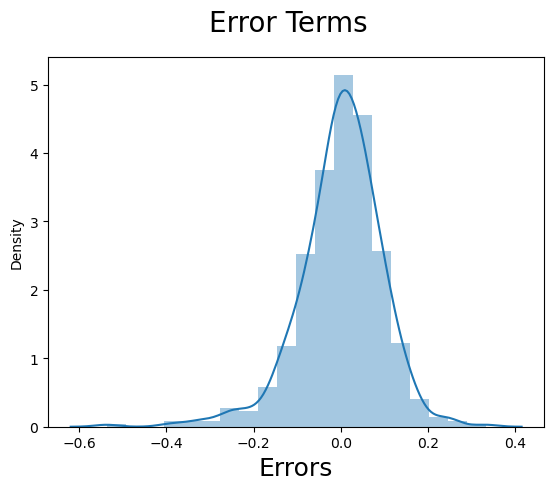

In [2661]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

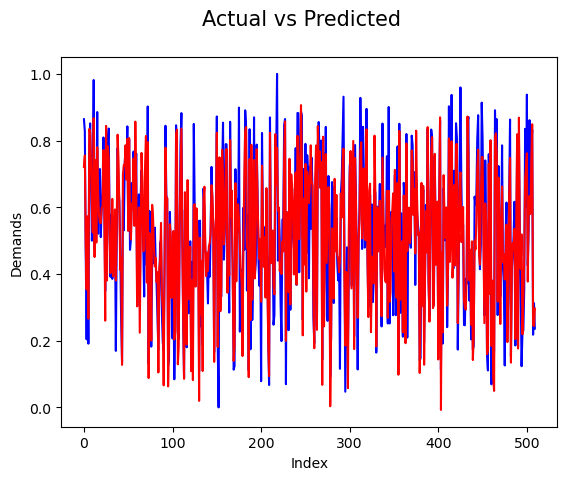

In [2662]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Model Predictions

### R-Squared value for train predictions

In [2663]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8188220920888463

#### Prediction of values on test dataset

In [2665]:
#Scale variables in X_test
# num_vars = ['temp','atemp','hum','windspeed']
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


#Test data to be transformed only, no fitting
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [2666]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Misty,weathersit_Mixed clouds,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.319635,0.652968,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.467403,0.477117,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [2667]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2668]:
# Creating X_test_m12 dataframe by dropping variables from X_test_m12

X_test_m12 = X_test[X_train_rfe.columns]


In [2669]:
# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test_m12)

In [2670]:
X_test_m12.head()

,const,season_Summer,season_Winter,mnth_Aug,mnth_Jan,mnth_Sep,weekday_Sutarday,weathersit_Mixed clouds,yr,workingday,temp,windspeed
184,1.0,0,0,0,0,0,0,0,0,0,0.831783,0.084219
535,1.0,1,0,0,0,0,0,1,1,1,0.901354,0.153728
299,1.0,0,1,0,0,0,0,0,0,1,0.511964,0.334206
221,1.0,0,0,1,0,0,0,1,0,1,0.881625,0.339570
152,1.0,1,0,0,0,0,0,1,0,1,0.817246,0.537414


In [2671]:
# Making predictions using the tewelth model
y_pred_m12 = lm_10.predict(X_test_m12)

### R-Squared value for test predictions

In [2672]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_pred_m12)

0.7831195352589025

### Evaluating the model

In [2673]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_pred_m12
r2_score(y_test, y_pred)

0.7831195352589025

Text(0, 0.5, 'y_pred')

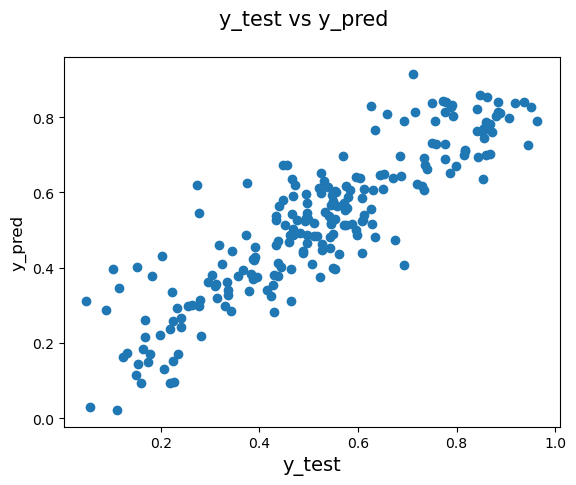

In [2674]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [2676]:
param = pd.DataFrame(lm_10.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.488858
8,yr,0.237253
2,season_Winter,0.121488
5,mnth_Sep,0.107894
7,weathersit_Mixed clouds,0.098906
1,season_Summer,0.097239
6,weekday_Sutarday,0.061845
3,mnth_Aug,0.055781
9,workingday,0.051308


### Final Conclusions :

By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

cnt = 0.544557×temp + 0.236815×yr + 0.122820×season_Winter + 0.097003 × weathersit_Mixed clouds + 0.093988 × mnth_Sep + 0.089566 × season_Summer + 0.063992 × weekday_Sutarday + 0.052911 × workingday - 0.008 − 0.177761 × windspeed


All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 0.78% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.544557)

windspeed : (-0.177761)

year (0.236815)

Hence, it can be clearly concluded that the variables temperature , windspeed and month are significant in predicting the demand for shared bikes .